<a href="https://colab.research.google.com/github/zubair9703/Semantic-Segmentation-on-Sentinel/blob/main/blending.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

In [ ]:
!cp /content/drive/MyDrive/Colab\ Notebooks/smooth_tiled_predictions.py /content

In [ ]:
!pip install segmentation_models

In [ ]:
import cv2
from skimage import io, img_as_ubyte
import numpy as np
import os
from matplotlib import pyplot as plt
# from patchify import patchify, unpatchify
from PIL import Image
import segmentation_models as sm
from smooth_tiled_predictions import predict_img_with_smooth_windowing

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
os.chdir("/content/drive/MyDrive/KRPETimages")

In [ ]:
from keras.models import load_model

model = load_model("landcover_100_epochs_VGG16_backbone_batch16.hdf5", compile=False)
# size of patches
patch_size = 64

# Number of classes 
n_classes = 11

In [ ]:
from skimage.io import imread,imsave

In [ ]:
!pip install imagecodecs

In [ ]:
import imagecodecs

In [ ]:
BACKBONE = 'vgg16'
preprocess_input = sm.get_preprocessing(BACKBONE)

# img = imread("/content/drive/MyDrive/pacthes/data/yelhanka/image.tif")
# # input_img = scaler.fit_transform(img.reshape(-1, img.shape[-1])).reshape(img.shape)
# # input_img = preprocess_input(img)
# io.imsave("imagetest.tif",img)

In [ ]:
im=imread("/content/drive/MyDrive/KRPETimages/pavgada212cliped.tif")
preprocess_input = sm.get_preprocessing(BACKBONE)
im = preprocess_input(im)
# im = scaler.fit_transform(im.reshape(-1, im.shape[-1])).reshape(im.shape)
print(im.shape)

In [ ]:
predictions_smooth = predict_img_with_smooth_windowing(
    im,
    window_size=patch_size,
    subdivisions=2,  # Minimal amount of overlap for windowing. Must be an even number.
    nb_classes=n_classes,
    pred_func=(
        lambda img_batch_subdiv: model.predict((img_batch_subdiv))
    )
)

In [ ]:
final_prediction = np.argmax(predictions_smooth, axis=2)

In [ ]:
print(final_prediction.shape)

In [ ]:
!pip install pyrsgis

In [ ]:
from pyrsgis import raster

In [ ]:
ds,img1=raster.read("/content/drive/MyDrive/heserghata.tif")

In [ ]:
raster.export(final_prediction, ds, filename="heserghatavgg16.tif", dtype='float')

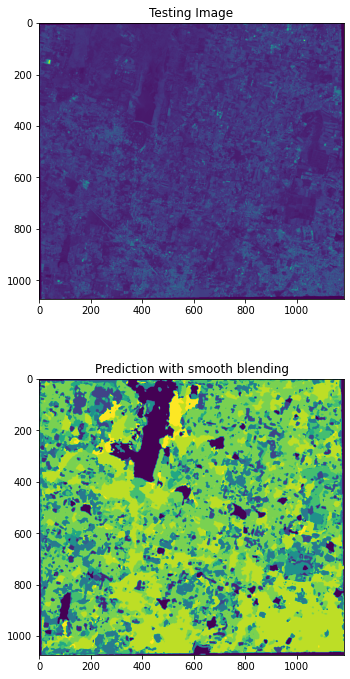

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.title('Testing Image')
plt.imshow(im[:,:,0])
# plt.subplot(222)
# plt.title('Testing Label')
# plt.imshow(original_mask)
plt.subplot(223)
plt.title('Prediction with smooth blending')
plt.imshow(final_prediction)
plt.show()